<a href="https://colab.research.google.com/github/StevenIQ/CIFAR-10_Vidal/blob/main/RapportProjet_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.utils import  np_utils
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# **Presentation CIFAR-10:**
  
Le CIFAR-10 est un ensemble souvent avec des images de taille 32x32 d'un total de 60 000 photos dont 50 000 de photos pour l'apprentissage et 10 000 pour le test. 
L'ensemble d'images appartient a une des classes suivantes: (10 classes)
- Avion
- Voiture
- Oiseau
- Chat
- Cerf
- Chien
- Grenouille
- Cheval
- Navire
- Camion



# Visualisation de l'ensemble CIFAR-10
Afin de voir avec quelles types d'images on doit travailler, tout d'abord on va charger le dataset puis en utilisant la librairie Matplotlib on va afficher quelques images.

In [ ]:
def loadData():
  (xtrain,ytrain),(xtest,ytest) = cifar10.load_data()
  print("Train: X=%s, Y=%s"%(xtrain.shape, ytrain.shape))
  print("Test: X=%s, Y=%s"%(xtest.shape, ytest.shape))
  return xtrain, ytrain, xtest, ytest

In [ ]:
xtrain, ytrain,xtest,ytest = loadData()

170500096/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), Y=(50000, 1)
Test: X=(10000, 32, 32, 3), Y=(10000, 1)


In [ ]:
# affichage de quelques photos:
def printImages(train):
  for i in range(6):
    plt.subplot(320+1+i)
    plt.imshow(train[i])
  plt.show()

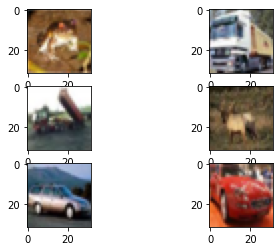

In [ ]:
printImages(xtrain)

# Preprocesing des données
Le preprocessing des donnees consiste à préparer les données pour pouvoir les utiliser pour nos futures modèles.
Dans notre cas le preprocessing consiste à charger les données et  transformer nos Y sous forme de *one hot encoding* ainsi que préparer les pixels.
- L'one hot encoding est faisable grâce à la function  `to_categorical()`
- Préparation des pixels: comme chaque image est compose de 3 cannaux (R, G,B) et chaque pixel a une valeur comprise entre 0 et 255, il faut ramener les valeurs des pixels à des valeurs comprises entre 0 et 1(Normalisation)

In [ ]:
# nbClasses: le nombre de classes i.e 10
def preprocessing(xtrain, ytrain, xtest,ytest, nbClasses):
  # one hot encoding
  ytrain = np_utils.to_categorical(ytrain, nbClasses)
  ytest = np_utils.to_categorical(ytest, nbClasses)
  # transformation des donnees vers float pour normaliser les pixels
  xtrain = xtrain.astype('float32')
  xtest = xtest.astype('float32')
  # normalisation
  xtrain = xtrain / 255.0
  xtest = xtest / 255.0
  
  return xtrain, ytrain, xtest, ytest

In [ ]:
xtrain, ytrain, xtest, ytest = loadData()
xtrain, ytrain, xtest, ytest = preprocessing(xtrain, ytrain, xtest, ytest, 10)

Train: X=(50000, 32, 32, 3), Y=(50000, 1)
Test: X=(10000, 32, 32, 3), Y=(10000, 1)


# Premier Modèle

Afin de trouver le modèle le plus adapté pour ce probleme, on est parti du modèle linéaire qui est facile a implanter et à entrainer.
Pour la loss function on a pris la `categorical_crossentropy` de `keras` qui est une fonction souvent utilisé pour les problèmes de classification

In [ ]:
def LinearModel(opt):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(10, activation = keras.activations.softmax))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= opt, metrics=keras.metrics.categorical_accuracy)
  return model

Une fois le modèle est défini,il est nécessaire de le train ainsi que de l'évaluer pour voir quel hyper-parametres qu'on doit changer.
Pour entrainer notre modèle linéaire, il faudra choisir un `batch_size` ainsi que le nombre des `epochs`.\
On a choisi de partir avec *100 epochs* et un *batch_size de 1024.*
Puis une fois le modéle train il faut l'évaluer avec l'ensemble de validation.

In [ ]:
model = LinearModel(keras.optimizers.Adam())
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)

Accuracy:  38.73000144958496


Il est important de présenter les résultats afin de pouvoir savoir quels hyper-parametres à changer pour améliorer le modèle, et visualiser l'evolution du modèle. \
Comme sur Collab on peut pas utiliser `Tensorboard` pour différentes raisons on a alors choisi d'utiliser la `matplotlib`

In [ ]:
def plotModel(logs):
  plt.title('Cross Entropy Loss')
  losses = logs.history['loss']
  plt.plot(losses)
  plt.show()

  plt.title('Validation loss')
  valLoss = logs.history['val_loss']
  plt.plot(valLoss)
  plt.show()

  metric = logs.history['categorical_accuracy']
  plt.title('Accuracy train')
  plt.plot(list(range(len(metric))), metric)
  plt.show()

  plt.title('Accuracy test')
  metric = logs.history['val_categorical_accuracy']
  plt.plot(list(range(len(metric))), metric)
  plt.show()


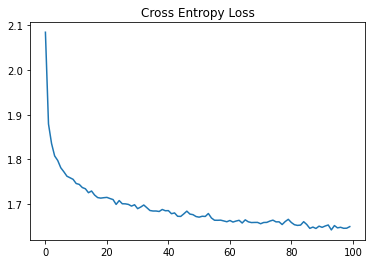

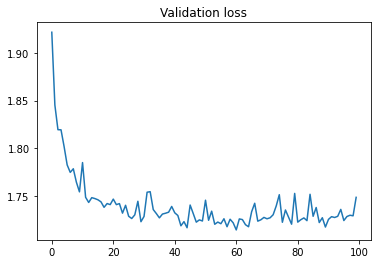

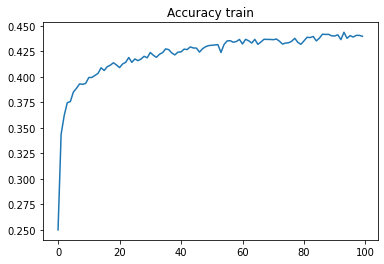

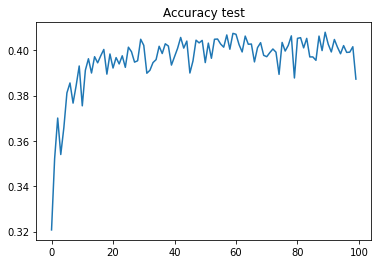

In [ ]:
plotModel(logs)

Ce qu'on a remarqué :
- Le modèle n'est pas stable ( beaucoup de variations )
- On underfit mais on a overfit
- L'accuracy n'est pas très élevé
\
Pour remédier ça, ce qu'on peut essayer c'est de diminuer le `batch_size` pour converger plus vite et ainsi on peut jouer sur le taux d'apprentisage 


In [ ]:
model = LinearModel(keras.optimizers.Adam(lr= 0.0006))
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 512, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)

Accuracy:  40.14999866485596


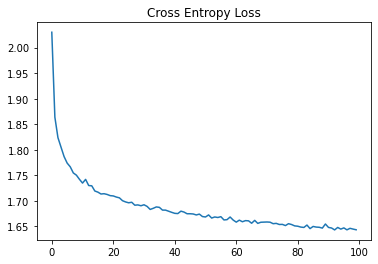

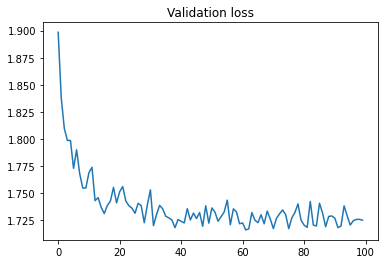

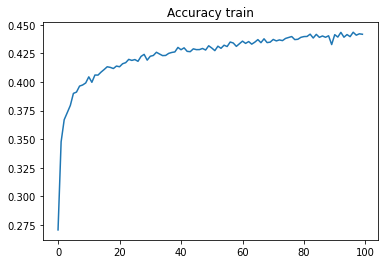

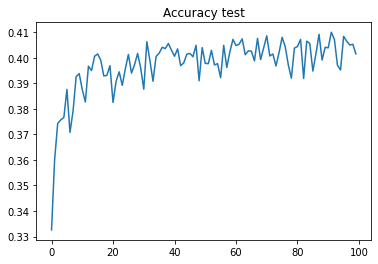

In [ ]:
plotModel(logs)

Suite aux changements on remarque une augmentation en accuracy mais cela n'est pas très parlant étant donné qu'il est pas encore stable.
On peut alors introduire le `decay` pour résoudre ce problème, mais cela peut nous couter en accuracy


Accuracy:  34.85000133514404


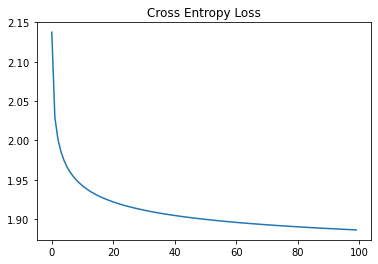

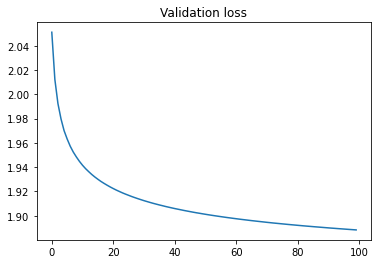

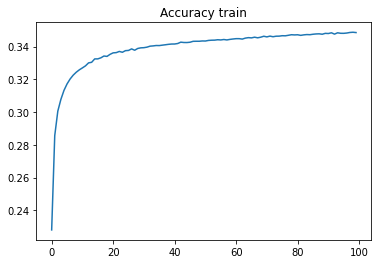

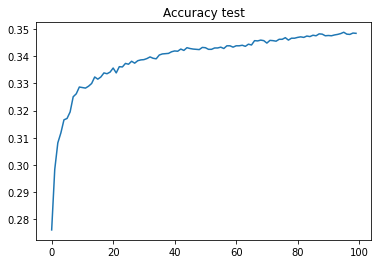

In [ ]:
model = LinearModel(keras.optimizers.Adam(lr= 0.001, decay =0.2))
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 512, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)
plotModel(logs)

Suite aux changements faites on remarque qu'avec un `decay = 0.2` on a un modèle plus stable mais notre accuracy a baissé enormément, ce qui a fait qu'on a peut éventuellement avoir une meilleure accuracy en augmentant le nombre d'epochs.\
Un moyen d'augmenter l'accuracy est de changer le `learning_rate = 0.01`


Accuracy:  38.96999955177307


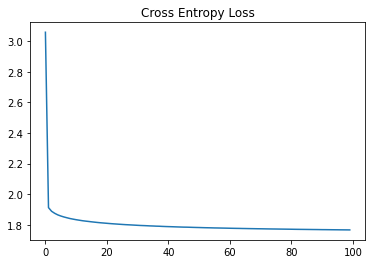

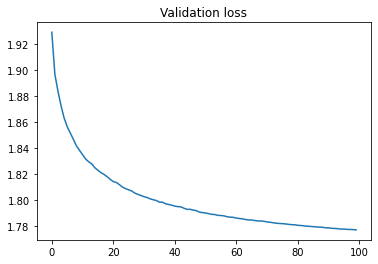

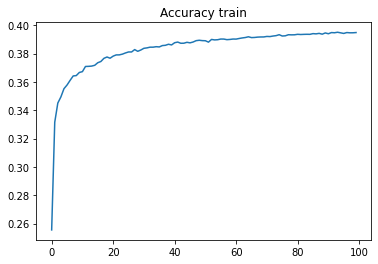

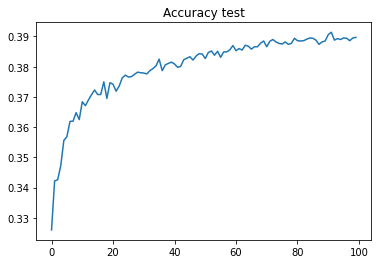

In [ ]:
model = LinearModel(keras.optimizers.Adam(lr= 0.01, decay =0.2))
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 512, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)
plotModel(logs)

# Deuxième Modèle
Etant donné les résultats obtenus sur le modèle linéaire, on a décidé alors de  s'orienter vers le perceptron multi-couches, en éspérant de pouvoir avoir une meilleure accuracy pour moins des epochs ainsi qu'avoir plus de facilités pour gérer l'overfitting/underfitting. 


In [ ]:
def MLP(activation,opt):
  model = Sequential()
  model.add(Dense(64,  activation=activation))
  model.add(Dense(128, activation=activation))
  model.add(Dense(10, activation= keras.activations.softmax))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= opt, metrics=keras.metrics.categorical_accuracy)
  return model


Afin de pouvoir train notre modèle, il faut `reshape` notre dataset.\
On va entrainer notre modele avec les paramètres suivants:
- epochs = 100
- Fonction d'activation: relu
- Optimizers : Adam

In [ ]:
# nb de images * taille * taille * nb de cannaux
xtrain = xtrain.reshape(50000, 32 * 32 * 3) 
xtest = xtest.reshape(10000, 32 * 32 * 3)

Accuracy:  50.08999705314636


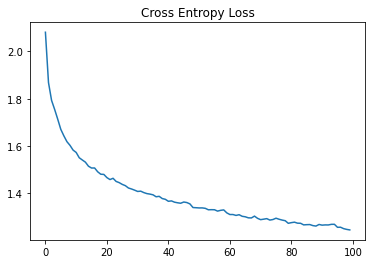

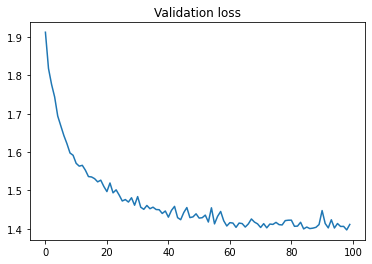

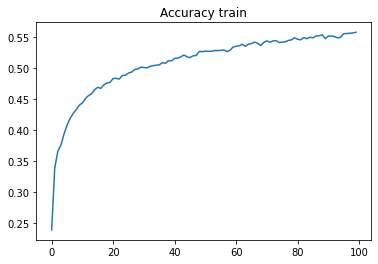

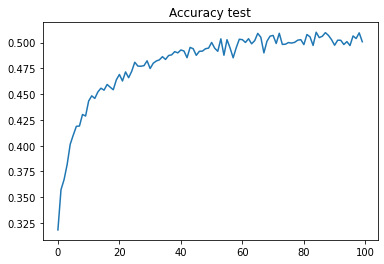

In [ ]:
model = MLP(keras.activations.relu,keras.optimizers.Adam())
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)
plotModel(logs)

On choisit alors d'introduire le `Dropout` afin de régulariser le modèle et de changer et de tester sur differentes types de functions d'activation:
- relu
- tanh
- selu 


In [ ]:
def plotModels(all_logs):
  for logs in all_logs:
    plt.title('Cross Entropy Loss')
    losses = logs.history['loss']
    plt.plot(losses)
  plt.show()
  for logs in all_logs:
    valLoss = logs.history['val_loss']
    plt.title('Validation loss')
    plt.plot(valLoss)
  plt.show()


  for logs in all_logs:
    metric = logs.history['categorical_accuracy']
    plt.title('Accuracy train')
    plt.plot(list(range(len(metric))), metric)
  plt.show()

  for logs in all_logs:
    plt.title('Accuracy test')
    metric = logs.history['val_categorical_accuracy']
    plt.plot(list(range(len(metric))), metric)
  plt.show()

Accuracy relu:  50.269997119903564
Accuracy tanh:  50.56999921798706
Accuracy selu:  51.87000036239624


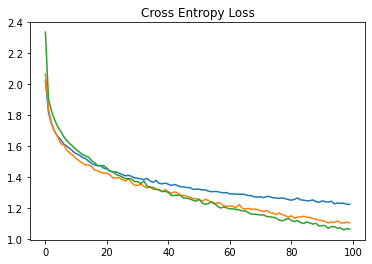

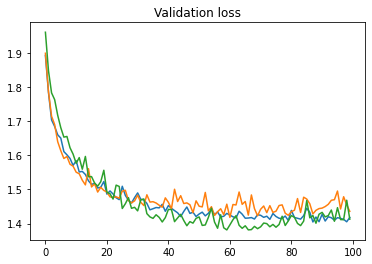

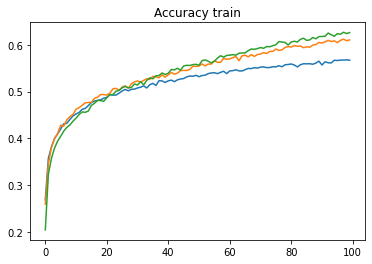

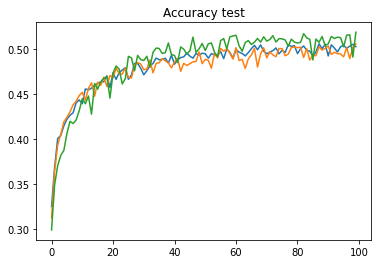

In [ ]:
all_logs = []
model = MLP(keras.activations.relu,keras.optimizers.Adam())
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy relu: " , accuracy *100)
all_logs.append(logs)
model = MLP(keras.activations.tanh,keras.optimizers.Adam())
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy tanh: " , accuracy *100)
all_logs.append(logs)
model = MLP(keras.activations.selu,keras.optimizers.Adam())
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy selu: " , accuracy *100)
all_logs.append(logs)
# evaluation du modele
plotModels(all_logs)

Legende:
- bleu: relu, 50.269997119903564
- orange: tanh, 50.56999921798706
- vert: selu, 51.87000036239624


Suite aux résultats: on a alors choisit d'introduire le `Dropout` après chaque couche `Dense`. La logique est de diminuer la propagation de mauvaise classificatoin apres chaque couche( surtout la premiere couche) mais aussi de limiter les variations.\
Aussi on a choisit d'augmenter le nombre de noeuds pour chaque couche Dense, de manière que la premiere ait plus de noeuds et que les prochaines couches possèdent moins.

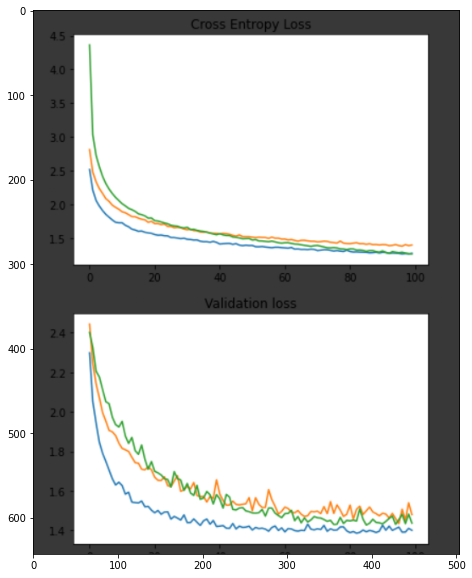

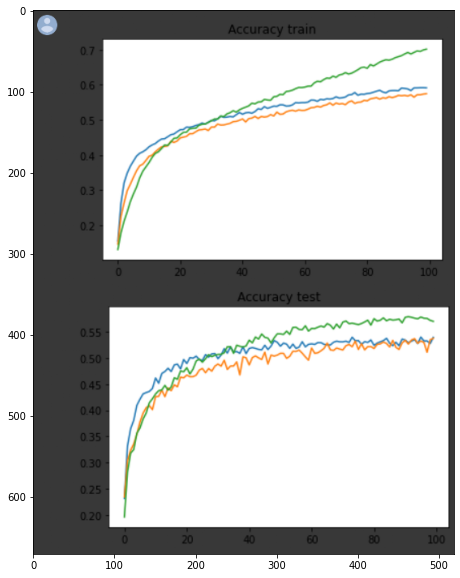

In [ ]:
image = mpimg.imread("/content/sample_data/MLP-1024Drop02-512Drop02-512Drop02-256Drop02-256Drop05-reluVStanhVSselu-1024Batch-loss.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
image = mpimg.imread("/content/sample_data/MLP-1024Drop02-512Drop02-512.Drop02-256Drop02-256Drop05-reluVStanhVSselu-1024Batch-acc.png")
plt.figure(figsize=(20,10))
plt.imshow(image)


# Troisième Modèle
Pour notre dernier modèle on a choisit de partir sur un modèle convolutionnel, CNN.\
Pour notre modéle convolutionnel, on a alors choisi de partir d'un modéle de base qui consiste à empiler un certain nombres de `Conv2D` suivi d'un `MaxPooling2D`. \
Pour pouvoir faire les prédictions on doit faire un `Flatten` et utiliser des couches `Dense` dont la derniére couche est la couche de sortie avec le nombre de classes dans notre dataset.
\
Afin de déterminer quel modèle de base qu'il faut choisir on va lancer 3 modèles differents pour voir lequel qui a plus de potentiel


In [ ]:
def CNN1(activationF, opt):
  model = Sequential()

  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
 
  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy, metrics=keras.metrics.categorical_accuracy)
  return model

In [ ]:
def CNN2(activationF, opt):
  model = Sequential()

  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
 
  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy, metrics=keras.metrics.categorical_accuracy)
  return model

In [ ]:
def CNN(activationF, opt):
  model = Sequential()

  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
  
  
  model.add(Conv2D(64,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(64,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
  
  model.add(Conv2D(128,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(128,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy, metrics=keras.metrics.categorical_accuracy)
  return model

Accuracy relu:  55.29000163078308
Accuracy relu:  55.29000163078308
Accuracy relu:  55.29000163078308


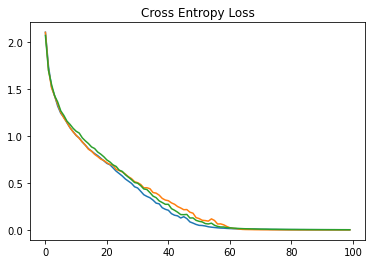

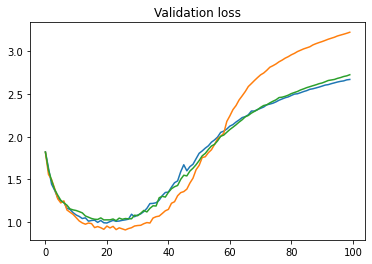

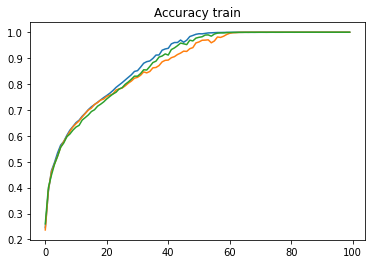

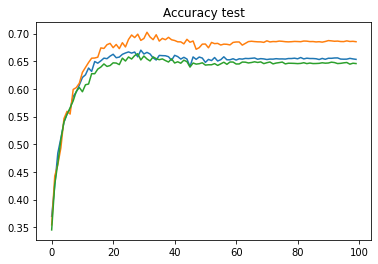

In [ ]:
model1 = CNN1(keras.activations.relu, keras.optimizers.SGD(lr= 0.01, momentum=0.9) )
model2 = CNN3(keras.activations.relu, keras.optimizers.SGD(lr= 0.01, momentum=0.9) )
model3= CNN(keras.activations.relu, keras.optimizers.SGD(lr= 0.01, momentum=0.9) )
all_logs = []
logs = model1.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy relu: " , accuracy *100)
all_logs.append(logs)
logs = model2.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy relu: " , accuracy *100)
all_logs.append(logs)
logs = model3.fit(xtrain, ytrain, epochs = 100, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy relu: " , accuracy *100)
all_logs.append(logs)


plotModels(all_logs)

On remarque alors que tous les modèles overfittent mais un seul nous donne une meilleure accuracy, celui avec le plus de couches `Conv2D` et de `MaxPooling2D`.\
Alors on peut introduire differentes techniques de regularisation afin de réduire le overfitting.\
Pour commencer on peut introduire le `Dropout` après chaque `MaxPooling2D` et comme on overfit vers 40 epochs on peut reduire le nombre d'epochs pour voir si on réussit à reduire le overfitting.

In [ ]:
def CNN(activationF, opt):
  model = Sequential()

  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  
  
  model.add(Conv2D(64,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(64,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(128,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(Conv2D(128,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy, metrics=keras.metrics.categorical_accuracy)
  return model

Accuracy:  74.51000213623047


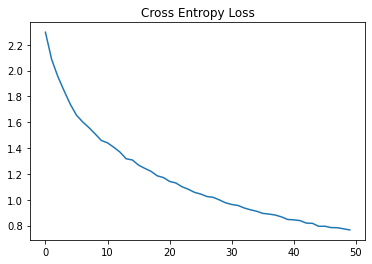

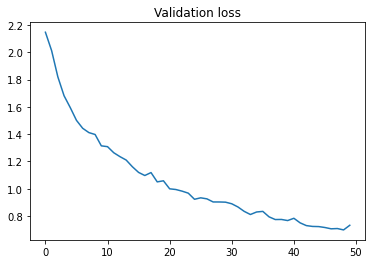

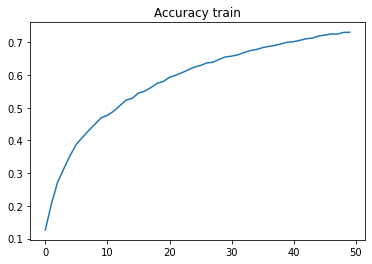

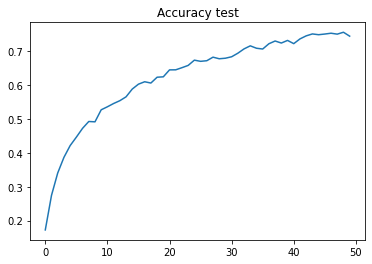

In [ ]:
model = CNN(keras.activations.relu,keras.optimizers.SGD(lr= 0.01, momentum=0.9))
logs = model.fit(xtrain, ytrain, epochs = 50, batch_size = 1024, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)
plotModel(logs)

On remarque que notre modèle ne overfit pas au bout de 50 epochs, or cela ne veut pas dire que au bout de 100 epochs il va pas overfit. Cependant, on sait que la taille du batch_size joue un rôle important dans l'apprentissage du modèle, alors on peut diminuer le `batch_size` et de diminuer le taux d'apprentissage a `0.001`

Accuracy:  80.0599992275238


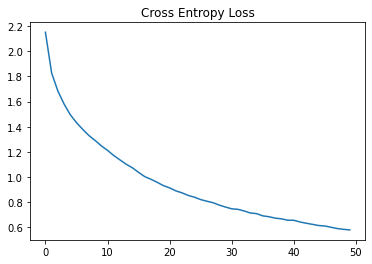

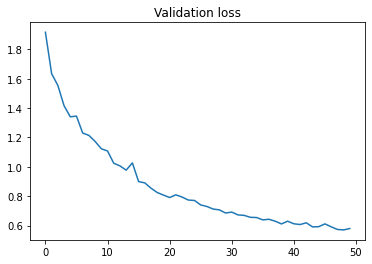

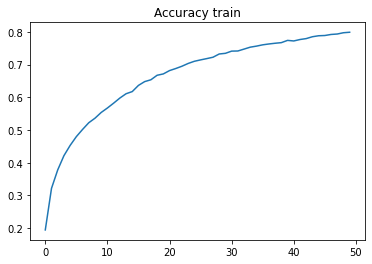

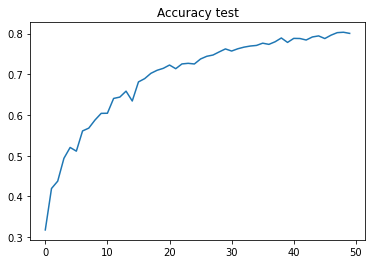

In [ ]:
model = CNN(keras.activations.relu,keras.optimizers.SGD(lr= 0.001, momentum=0.9))
logs = model.fit(xtrain, ytrain, epochs = 50, batch_size = 64, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)
plotModel(logs)

On remarque que le modèle,  il underfit mais il varie pas autant et on a atteint une accuracy correte. On peut facilement augmenter le nombre d'epochs

Accuracy:  83.24999809265137


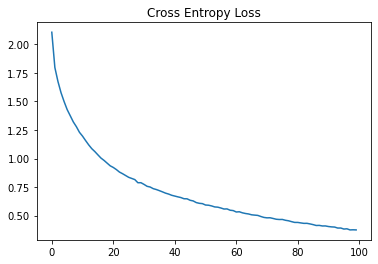

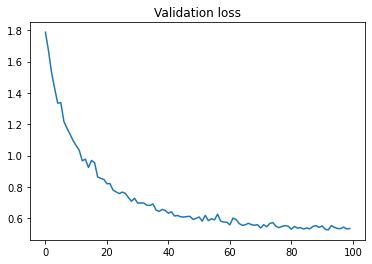

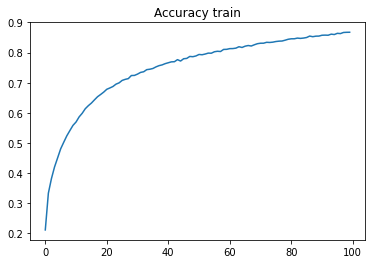

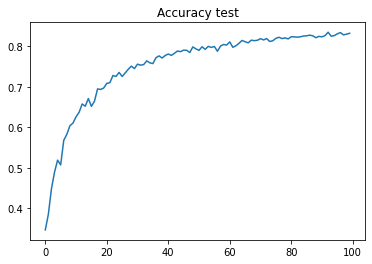

In [ ]:
model = CNN(keras.activations.relu,keras.optimizers.SGD(lr= 0.001, momentum=0.9))
logs = model.fit(xtrain, ytrain, epochs = 100, batch_size = 64, validation_data = (xtest, ytest), verbose =0)
# evaluation du modele
_, accuracy = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: " , accuracy *100)
plotModel(logs)

On remarque qu'on ne overfit pas et que l'accuracy continue d'augmenter. Alors on peut augmenter le dataset en utilisant la méthode de Data Augmentation.

# Data Augmentation
Data augmentation consiste à copier l'ensemble d'entrainement et faire des petites modifications, comme rotations horizontales, de rogner l'image ou bien de faire des decalages en hauteur et en largeur.\
Grâce à la bibliothèque `ImageDataGenerator` on pourra appliquer cette méthode pour faire des rotations et decalages.


In [ ]:
model = CNN(keras.activations.selu, keras.optimizers.SGD(lr= 0.001, momentum= 0.96) )
# on creer le generateur de donnees, images
dataAugment = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
# dataAugment.fit(xtrain)
# l'iterator
train = dataAugment.flow(xtrain,ytrain, batch_size = 64)
steps = int(xtrain.shape[0]/64)
# on fit le modele
logs = model.fit_generator(train, steps_per_epoch = steps, epochs = 100, validation_data =(xtest, ytest), verbose = 0)
_, acc = model.evaluate(xtest, ytest)
print('>%.3f'%(acc*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4385 - categorical_accuracy: 0.8648
>86.480


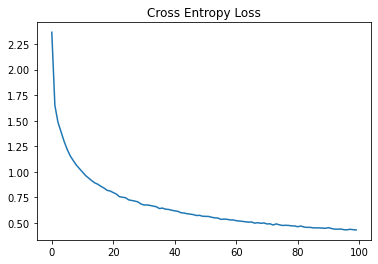

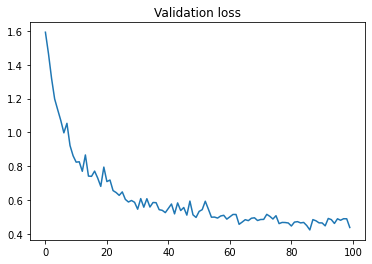

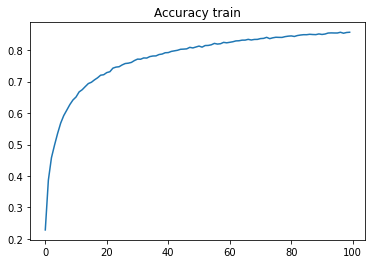

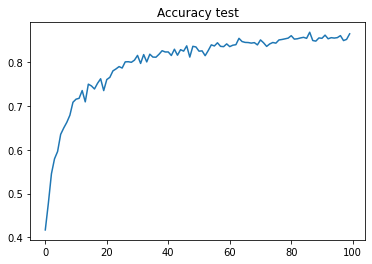

In [ ]:
plotModel(logs)

# Batch Normalization
Le Batch Normalization, ajoute une couche de normalization après chaque couche de Conv2D, cela permet au modèle de converger plus vite et avoir une meilleure accuracy.\
Alors, nous pouvons ajouter le Batch Normalization dans le but de stabiliser l'apprentissage et peut-être accélérer ce dernier processus 

In [ ]:
def CNN(activationF, opt):
  model = Sequential()
  
  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2)) # overfitting regul
  
  model.add(Conv2D(64,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2)) # overfitting regul
  
  model.add(Conv2D(128,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2)) # overfitting regul
  

  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dropout(0.5)) # overfitting regul
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy , metrics=keras.metrics.categorical_accuracy)

  return model

In [ ]:
model = CNN(keras.activations.selu, keras.optimizers.SGD(lr= 0.001, momentum= 0.96) )
# on creer le generateur de donnees, images
dataAugment = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
# l'iterator
train = dataAugment.flow(xtrain,ytrain, batch_size = 64)
steps = int(xtrain.shape[0]/64)
# on fit le modele
logs = model.fit_generator(train, steps_per_epoch = steps, epochs = 100, validation_data =(xtest, ytest), verbose = 0)
_, acc = model.evaluate(xtest, ytest)
print('>%.3f'%(acc*100))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 64)      

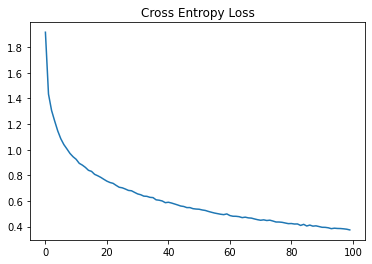

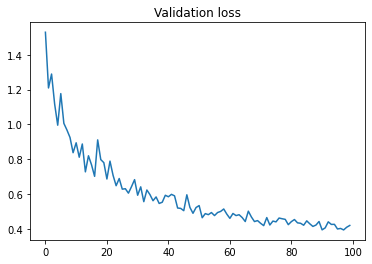

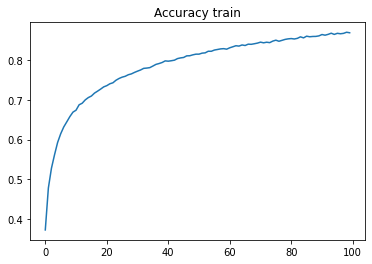

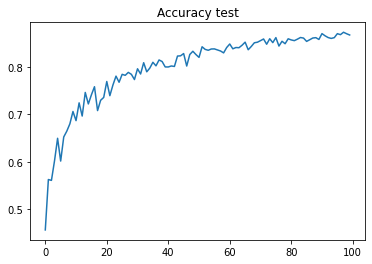

In [ ]:
plotModel(logs)

Comme on peut le voir malgré la tentative de limiter les variations avec le batch normalization il y a toujours des variation.\
Un moyen de reduire les variatios c'est d'utliser un Dropout incremental.

# Modèle Final

In [ ]:
def CNN(activationF, opt):
  model = Sequential()
  
  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2)) # overfitting regul
  
  model.add(Conv2D(64,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.3)) # overfitting regul
  
  model.add(Conv2D(128,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.4)) # overfitting regul
  

  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dropout(0.5)) # overfitting regul
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy , metrics=keras.metrics.categorical_accuracy)


  return model

In [ ]:
model = CNN(keras.activations.relu, keras.optimizers.SGD(lr= 0.001, momentum= 0.95) )
dataAugment = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
# dataAugment.fit(xtrain)
train = dataAugment.flow(xtrain,ytrain, batch_size = 64)
steps = int(xtrain.shape[0]/64)
logs = model.fit_generator(train, steps_per_epoch = steps, epochs = 100, validation_data =(xtest, ytest), verbose = 0)
_, acc = model.evaluate(xtest, ytest)
model.save('relu+dataAugment_1.h5')
print('>%.3f'%(acc*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4412 - categorical_accuracy: 0.8523
>85.230


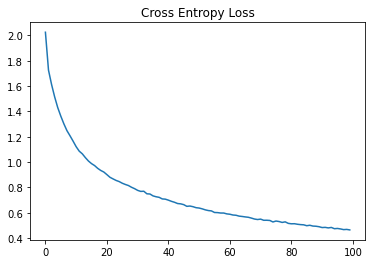

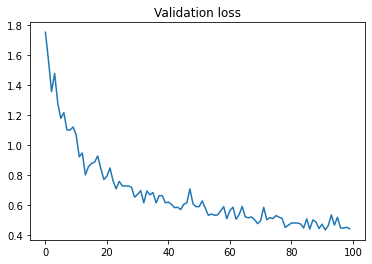

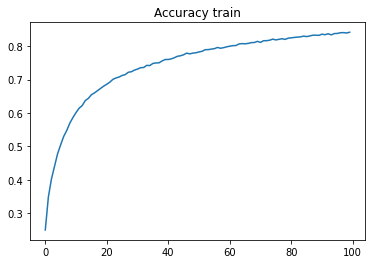

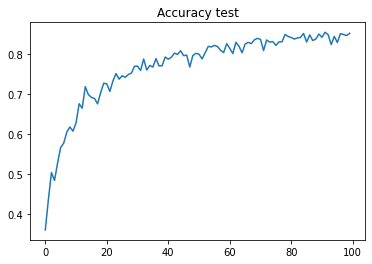

In [ ]:
plotModel(logs)

Ce qu'on remarque sur les courbes, c'est qu'on peut augmenter le nombre d'epochs car le modèle ne overfit et qu'il peut faire mieux.\
Ainsi on va le train pour 400 epochs puis pour 800 epochs et nous allons comparer les resultats.

In [ ]:
model = CNN(keras.activations.selu, keras.optimizers.SGD(lr= 0.001, momentum= 0.95) )
dataAugment = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
train = dataAugment.flow(xtrain,ytrain, batch_size = 64)
steps = int(xtrain.shape[0]/64)
logs = model.fit_generator(train, steps_per_epoch = steps, epochs = 400, validation_data =(xtest, ytest), verbose = 0)
_, acc = model.evaluate(xtest, ytest)
print('>%.3f'%(acc*100))

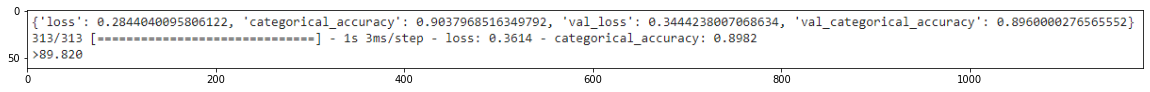

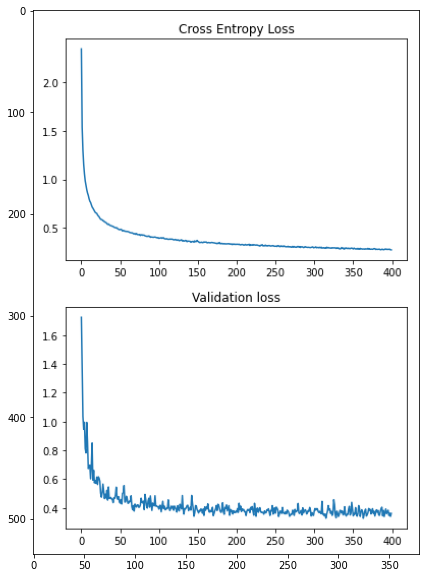

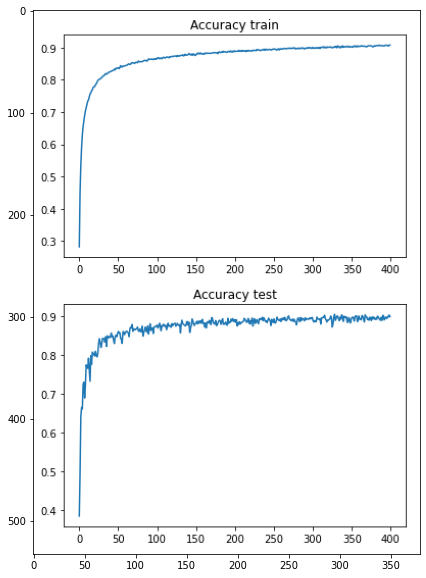

In [ ]:
image = mpimg.imread("rapport_400epochs_resultat.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
image = mpimg.imread("rapport_400epochs_loss.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
image = mpimg.imread("rapport_400epochs_acc.png")
plt.figure(figsize=(20,10))
plt.imshow(image)



In [ ]:
# on load le modele train pour 800 epochs
xtrain, ytrain, xtest, ytest =  loadData()
xtrain, ytrain, xtest, ytest = preprocessing(xtrain, ytrain, xtest, ytest, 10)
model = tf.keras.models.load_model('/content/sample_data/model_final.h5')
_, accuracy = model.evaluate(xtest, ytest)
print('Accuracy: ', (accuracy*100))

Train: X=(50000, 32, 32, 3), Y=(50000, 1)
Test: X=(10000, 32, 32, 3), Y=(10000, 1)
313/313 [==============================] - 27s 86ms/step - loss: 0.3221 - categorical_accuracy: 0.9068
Accuracy:  90.67999720573425


Ce qu'on remarque c'est que au bout de 400 epochs on atteint une accuracy proche de 90%, 89.82%, et au bout de 800 epochs on a une accuracy de 90.67% qui est proche de 91%.

# Conclusion

Durant ce projet on a pu prendre en mains les différents types de modèles mais seulement un seul nous satisfait en termes de performances, le CNN.
Les résultats qu'on a pu avoir  au final sont assez satisfaisantes, toutes fois on peut se demander quelles sont les limites du modeèle developpé, ainsi que les résultats possibles en changeant la fonction d'activation ou bien le optimizers.